In [1]:
import os

from gensim import corpora
import pickle
from utils import sentences_for_category, read_dataset,tokenize
from typing import *
from model import DataSource
import nltk
import json

def prepare_corpus_and_dictionary(category: str, kind:str, datasources: List[DataSource]):
    texts = [[]]
    with open(f"tokens-{category}-{kind}-full-text.txt", "r") as f:
        texts = json.load(f)

    print(f"creating dictionary for category {category}, kind {kind}, number of texts {len(texts[0])}")
    dictionary = corpora.Dictionary(texts)
    dictionary.save(f'dictionary-{category}-{kind}.gensim')

    print(f"creating corpus for category {category}, kind {kind}")
    corpus = [dictionary.doc2bow(text) for text in texts]
    pickle.dump(corpus, open(f'corpus-{category}-{kind}.pkl', 'wb'))

    print(f"dictionary and corpus saved for category {category}, kind {kind}")
    
for category in ["scientific-before", "scientific-after", "non-scientific-before", "non-scientific-after"]:
    for kind in ["no-preprocessing", "preprocessing"]:
        prepare_corpus_and_dictionary(category, kind, read_dataset(f"sentences-annotated-{category}.csv"))
print("done")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexander/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alexander/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/alexander/ou/IM0802 - Responsible Artificial Intelligence/assignment/assignment2/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/alexander/ou/IM0802 - Responsible Artificial Intelligence/assignment/assignment2/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


creating dictionary for category scientific-before, kind no-preprocessing, number of texts 25117
creating corpus for category scientific-before, kind no-preprocessing
dictionary and corpus saved for category scientific-before, kind no-preprocessing
creating dictionary for category scientific-before, kind preprocessing, number of texts 11502
creating corpus for category scientific-before, kind preprocessing
dictionary and corpus saved for category scientific-before, kind preprocessing
creating dictionary for category scientific-after, kind no-preprocessing, number of texts 4664
creating corpus for category scientific-after, kind no-preprocessing
dictionary and corpus saved for category scientific-after, kind no-preprocessing
creating dictionary for category scientific-after, kind preprocessing, number of texts 2088
creating corpus for category scientific-after, kind preprocessing
dictionary and corpus saved for category scientific-after, kind preprocessing
creating dictionary for catego

In [22]:
import gensim
from gensim import corpora
import pickle
NUM_TOPICS = 100
NUM_WORDS = 10

from dataclasses import dataclass
import numpy as np

def prepare_model(category: str, kind: str):
    corpus = pickle.load(open(f'corpus-{category}-{kind}.pkl', 'rb'))
    dictionary = corpora.Dictionary.load(f'dictionary-{category}-{kind}.gensim')
    print(f"generating LDA model for category {category} and kind {kind}")
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50)
    ldamodel.save(f'topic-model-{category}-{kind}.gensim')
    print(f"LDA model generated for category {category} and kind {kind}")
    print(f"generating tfidf model for category {category} and kind {kind}")
    tdidfmodel = gensim.models.tfidfmodel.TfidfModel(corpus, id2word=dictionary)
    tdidfmodel.save(f'topic-model-tfidf-{category}-{kind}.gensim')
    print(f"tfidf model generated for category {category} and kind {kind}")
    
for category in ["scientific-before", "scientific-after", "non-scientific-before", "non-scientific-after"]:
    for kind in ["no-preprocessing", "preprocessing"]:
        prepare_model(category, kind)
print("done")


generating LDA model for category scientific-before and kind no-preprocessing
LDA model generated for category scientific-before and kind no-preprocessing
generating tfidf model for category scientific-before and kind no-preprocessing
tfidf model generated for category scientific-before and kind no-preprocessing
generating LDA model for category scientific-before and kind preprocessing
LDA model generated for category scientific-before and kind preprocessing
generating tfidf model for category scientific-before and kind preprocessing
tfidf model generated for category scientific-before and kind preprocessing
generating LDA model for category scientific-after and kind no-preprocessing
LDA model generated for category scientific-after and kind no-preprocessing
generating tfidf model for category scientific-after and kind no-preprocessing
tfidf model generated for category scientific-after and kind no-preprocessing
generating LDA model for category scientific-after and kind preprocessing


generating topics for category scientific-before and kind preprocessing
Topics for scientific-before-preprocessing:


topic_number 83, topic_values [('like', 0.20496579), ('think', 0.055295873), ('kind', 0.03608212), ('actually', 0.028443994), ('basically', 0.026529657), ('feel', 0.019445265), ('hard', 0.014162424), ('interesting', 0.01314161), ('would', 0.0127605675), ('transformer', 0.012406933)]
topic_number 77, topic_values [('brute', 0.07714846), ('hmm', 0.057156973), ('interview', 0.055031653), ('mm', 0.052843045), ('theology', 0.039848868), ('campaign', 0.024933362), ('formalize', 0.024764251), ('stimulate', 0.02396164), ('intellect', 0.023541225), ('efficiency', 0.020849014)]
topic_number 49, topic_values [('learning', 0.061473656), ('think', 0.030984506), ('one', 0.023697048), ('lot', 0.021644391), ('go', 0.02055373), ('datum', 0.018389106), ('learn', 0.018147776), ('machine', 0.016882211), ('thing', 0.015343216), ('work', 0.014087813)]
topic_number 98, topic_values [('technol

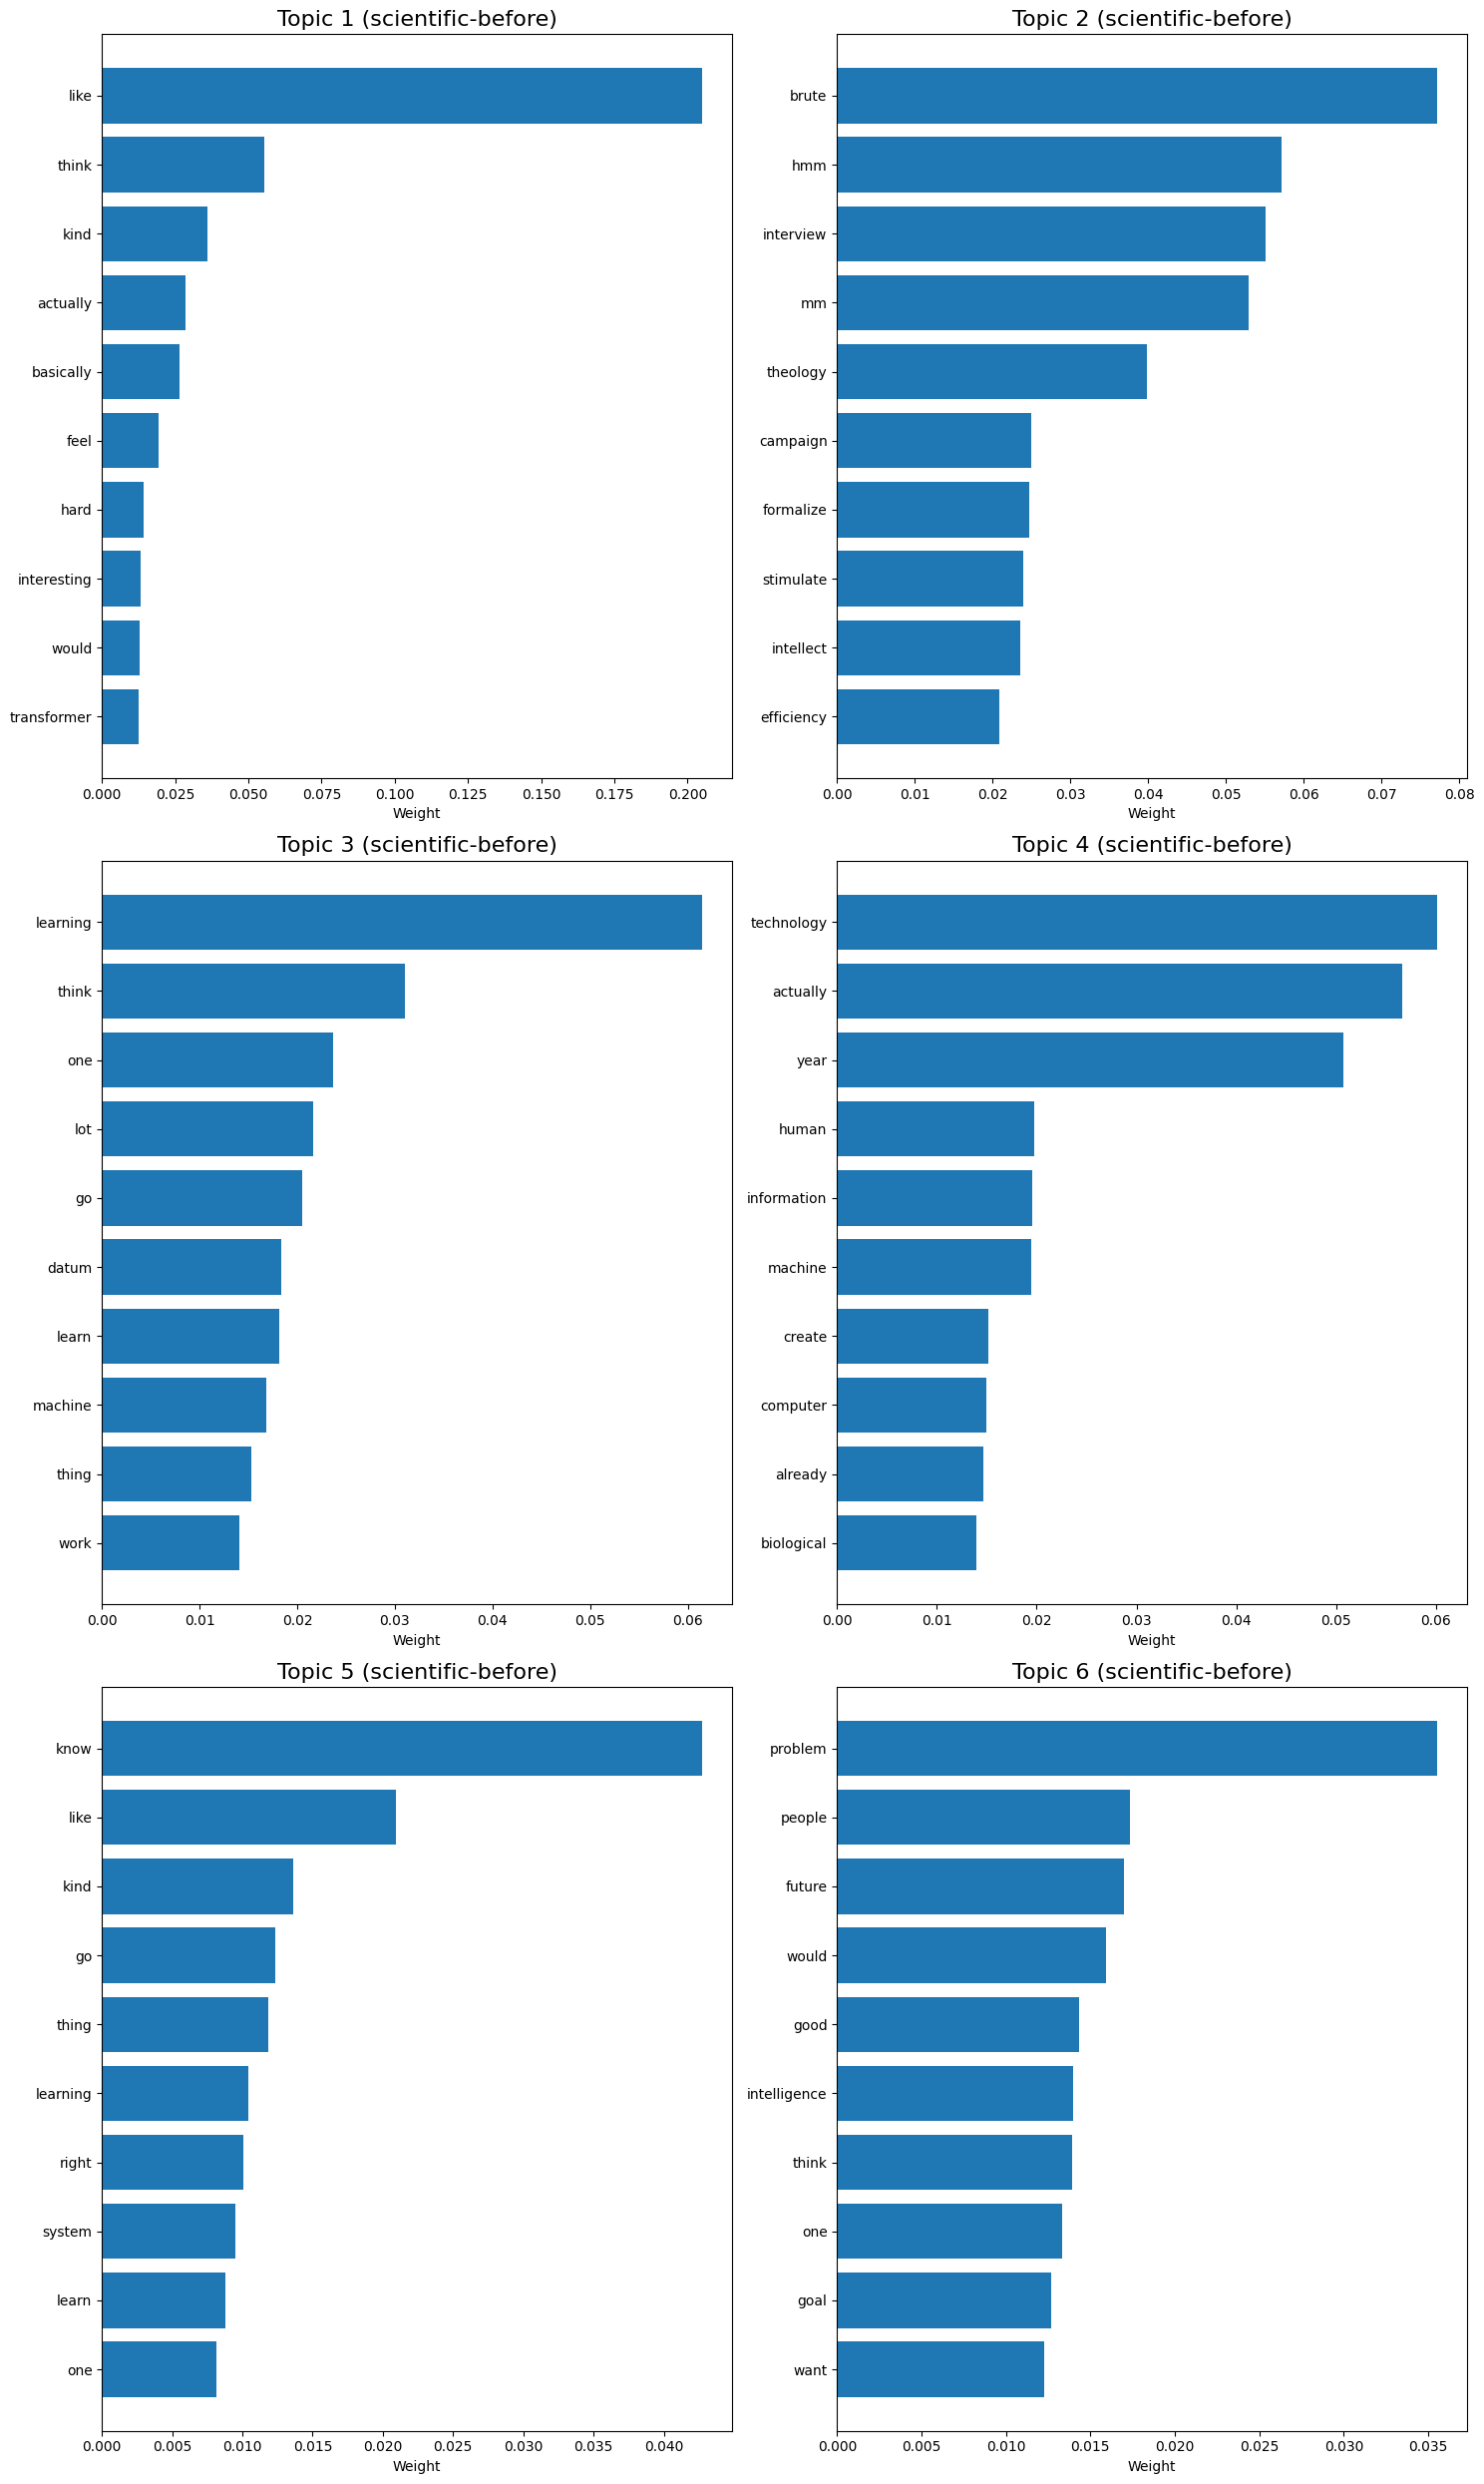

generating topics for category scientific-after and kind preprocessing
Topics for scientific-after-preprocessing:


topic_number 52, topic_values [('like', 0.06765932), ('would', 0.041724183), ('think', 0.038026463), ('could', 0.021758372), ('kind', 0.015471129), ('might', 0.014390299), ('one', 0.014196398), ('well', 0.014031698), ('maybe', 0.010135414), ('mean', 0.00969183)]
topic_number 40, topic_values [('ai', 0.04564247), ('know', 0.03601046), ('think', 0.0260001), ('lot', 0.017212994), ('one', 0.017017517), ('build', 0.016281387), ('see', 0.0139144845), ('work', 0.01290706), ('many', 0.01263488), ('company', 0.010424578)]
topic_number 92, topic_values [('agi', 0.038541887), ('intelligence', 0.037152924), ('ai', 0.031834956), ('human', 0.02271622), ('super', 0.017151961), ('artificial', 0.014293555), ('could', 0.013493076), ("'s", 0.012930067), ('intelligent', 0.012106672), ('become', 0.009561875)]
topic_number 12, topic_values [('altitude', 0.028827643), ('nominearity', 0.02882757

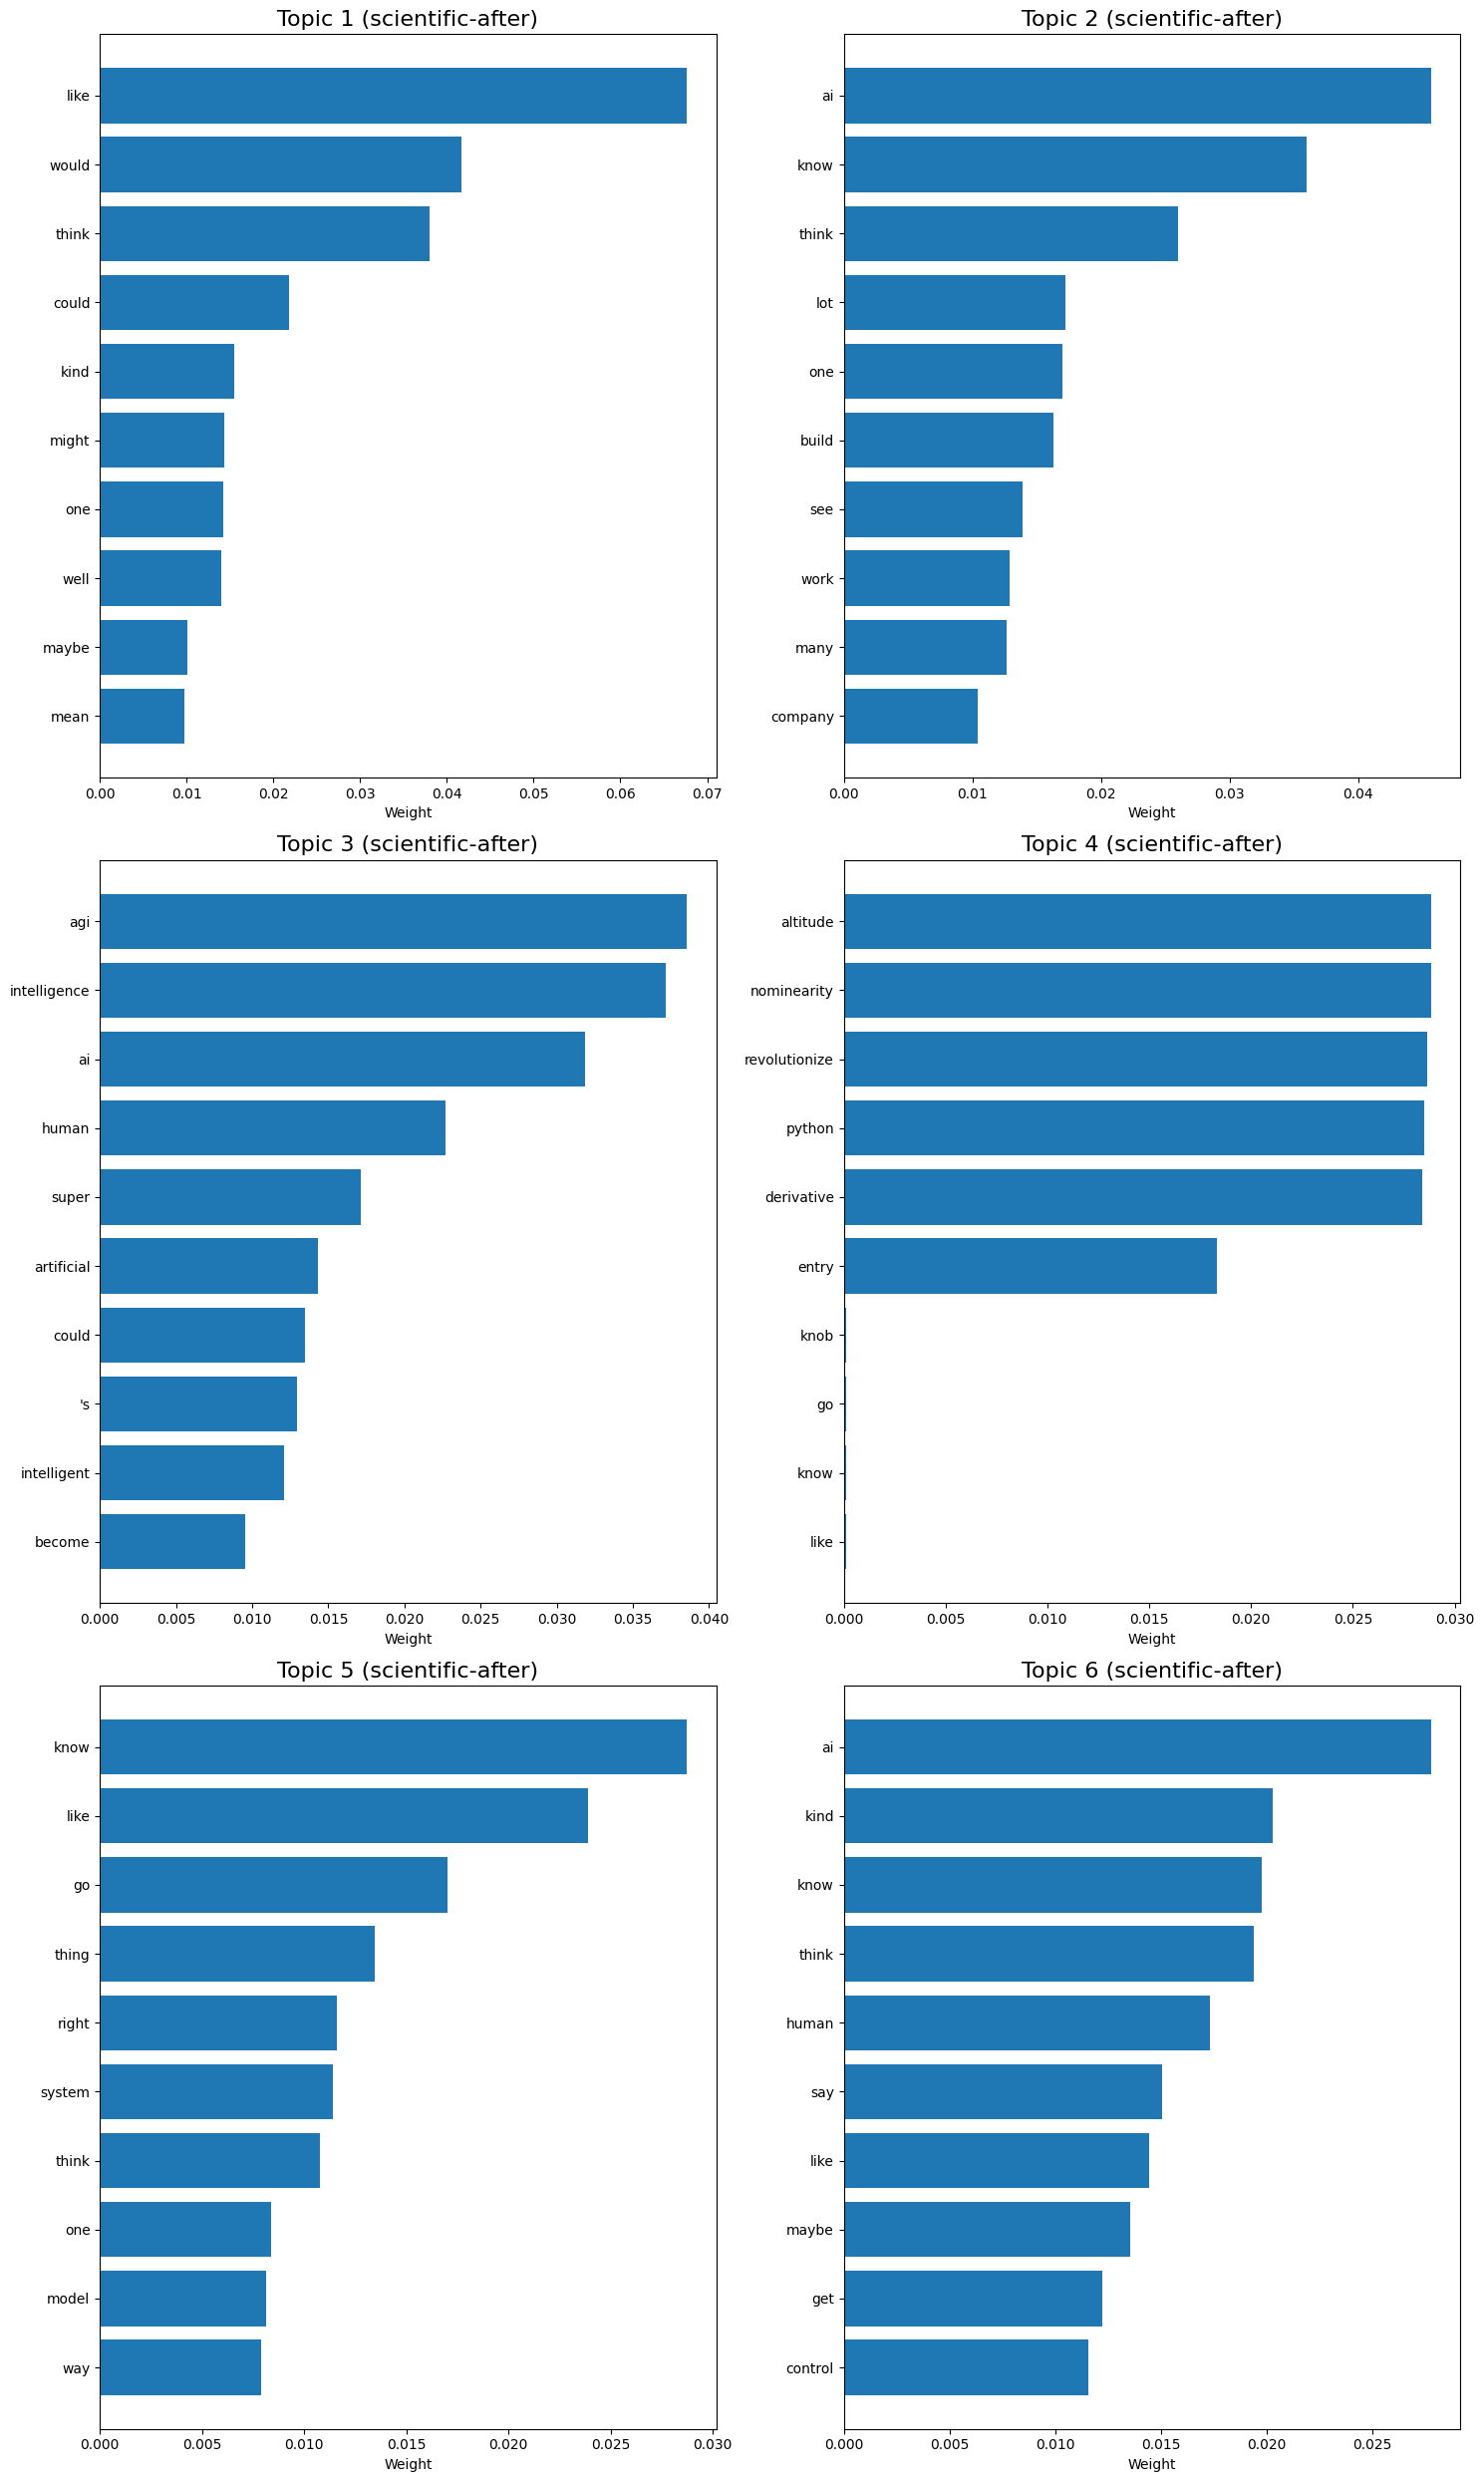

generating topics for category non-scientific-before and kind preprocessing
Topics for non-scientific-before-preprocessing:


topic_number 55, topic_values [('like', 0.10574136), ('think', 0.046801765), ('go', 0.030428061), ('know', 0.026263291), ('thing', 0.019003332), ('model', 0.011764394), ('get', 0.011588115), ('one', 0.011218053), ('ai', 0.011162281), ('people', 0.010483353)]
topic_number 37, topic_values [('like', 0.061019376), ('know', 0.0271844), ('thing', 0.014697946), ('get', 0.014375764), ('think', 0.013258331), ('say', 0.010418556), ('would', 0.009234239), ('lot', 0.0084217815), ('mean', 0.0083057955), ('really', 0.008257551)]
topic_number 43, topic_values [('know', 0.03672415), ('think', 0.034790214), ('like', 0.03406327), ('people', 0.021352956), ('go', 0.01768842), ('thing', 0.017300688), ('kind', 0.013107521), ('mean', 0.011654237), ('lot', 0.011449463), ('right', 0.010452481)]
topic_number 34, topic_values [('know', 0.030201297), ('well', 0.020809734), ('work', 0.0207

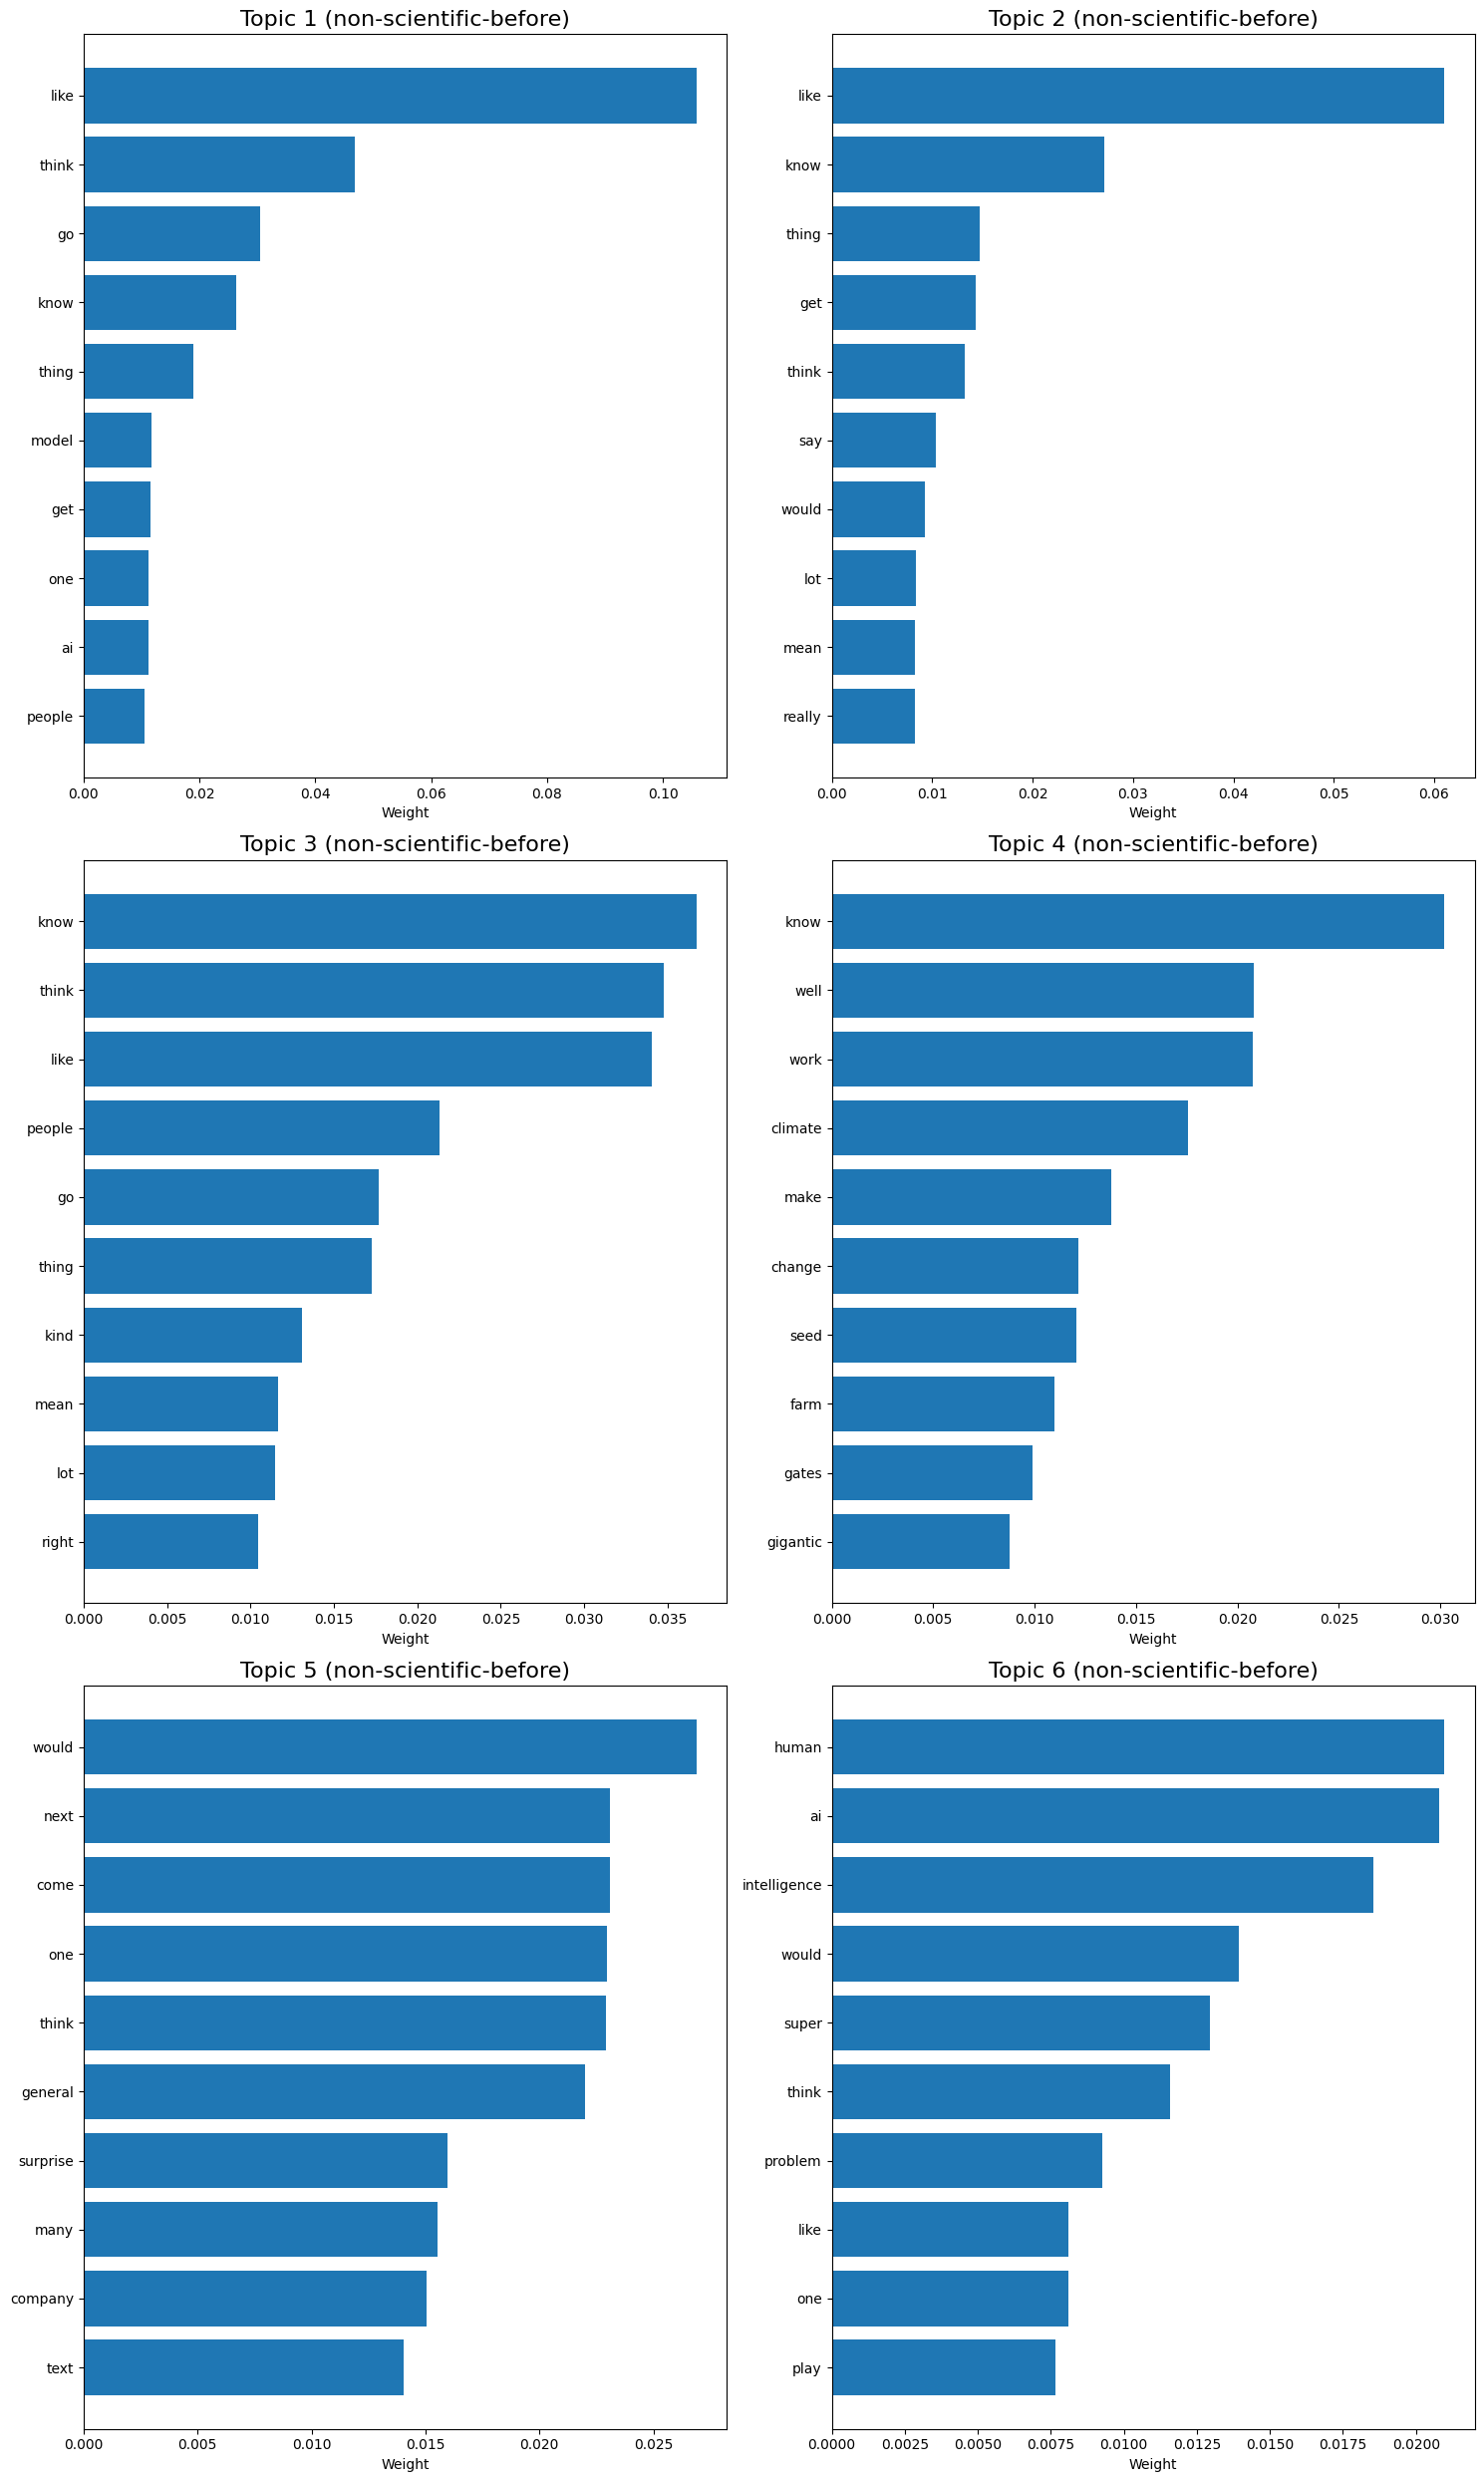

generating topics for category non-scientific-after and kind preprocessing
Topics for non-scientific-after-preprocessing:


topic_number 69, topic_values [('capability', 0.0851839), ('creativity', 0.07224419), ('express', 0.03620648), ('wonderful', 0.036206346), ('audio', 0.035236407), ('workforce', 0.024172625), ('absorb', 0.024172608), ('hello', 0.024172602), ('brick', 0.024172598), ('mitigate', 0.024172598)]
topic_number 58, topic_values [('like', 0.049332794), ('think', 0.028475009), ('know', 0.02595109), ('go', 0.023309128), ('thing', 0.016726518), ('people', 0.015238585), ('get', 0.012365176), ('say', 0.010909505), ('really', 0.010640982), ('ai', 0.009959406)]
topic_number 14, topic_values [('think', 0.03854972), ('like', 0.034943614), ('intelligence', 0.02936309), ('know', 0.024480287), ('breakthrough', 0.017949242), ('people', 0.01667294), ('gpt4', 0.01666644), ('one', 0.016511181), ('human', 0.01491981), ('world', 0.013949635)]
topic_number 38, topic_values [('like', 0.0300489

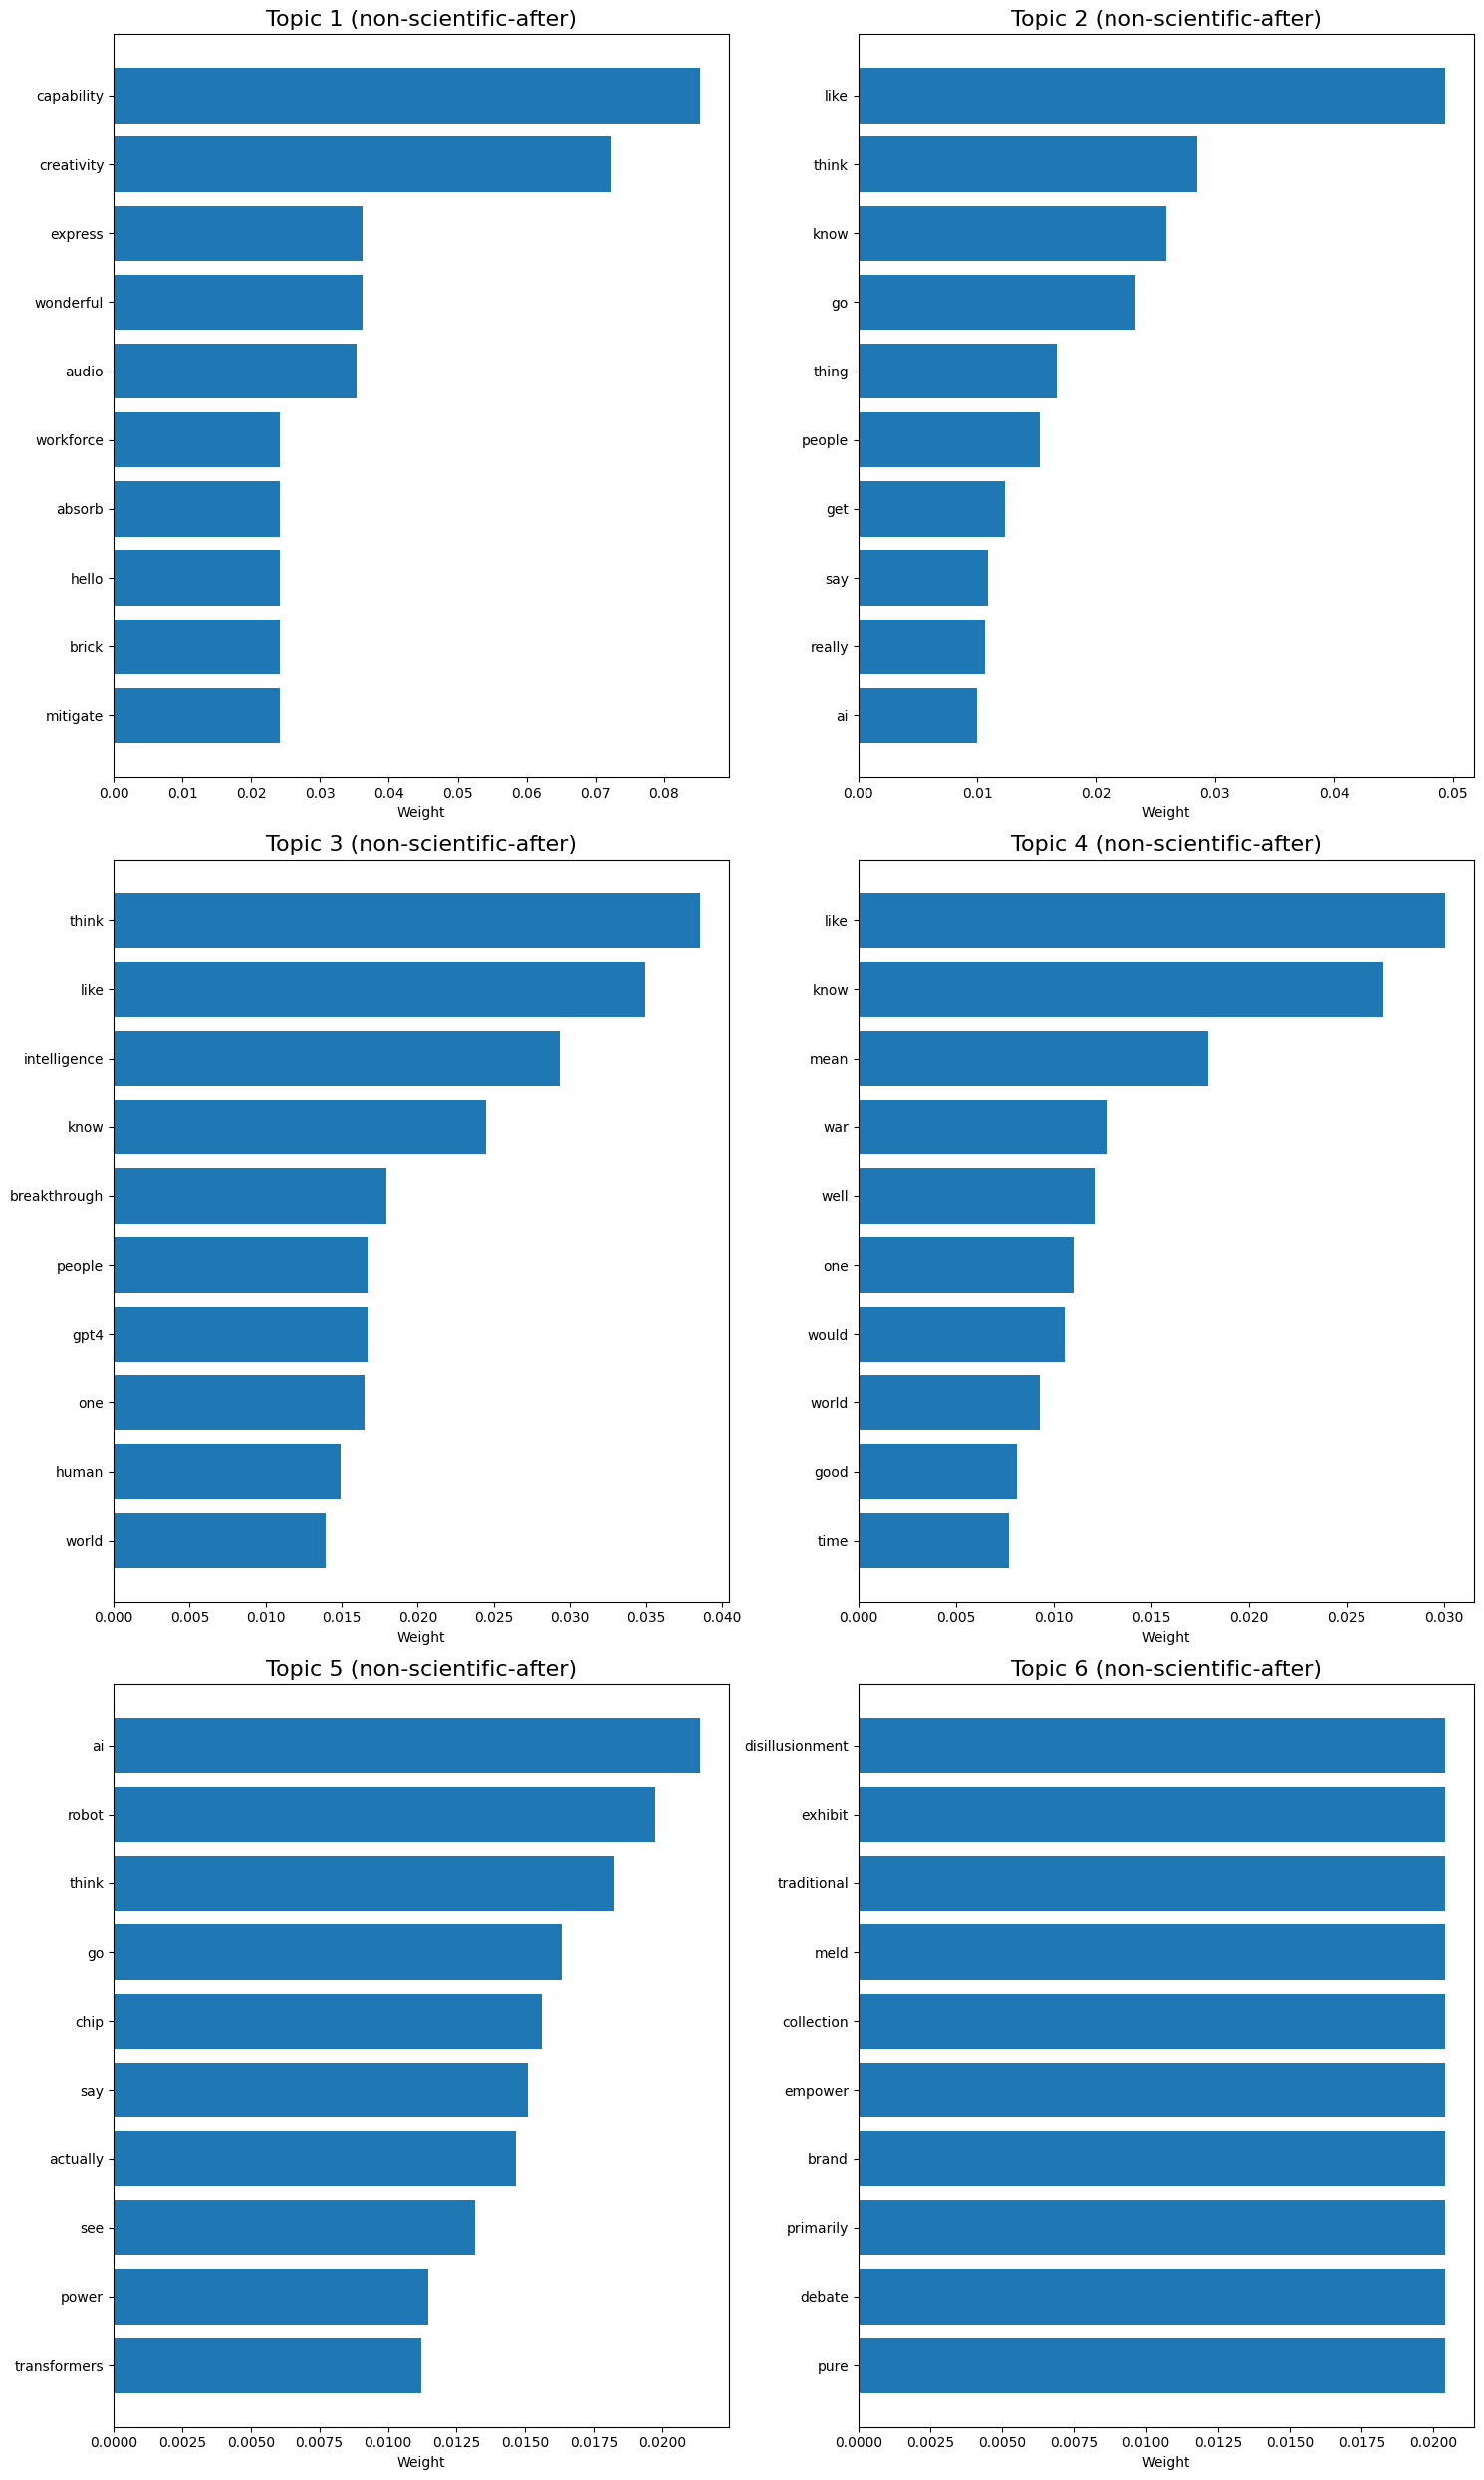

done


In [39]:
from dataclasses import dataclass
import matplotlib.pyplot as plt
import os
import numpy as np

@dataclass
class TopicData:
    words: List[str]
    weights: List[float]
    num: int
    title: str

def plot_data_on_ax(data: TopicData, ax: plt.Axes):
    y_pos = np.arange(len(data.words))
    ax.barh(y_pos, data.weights, align='center')
    ax.set_yticks(y_pos, labels=data.words)
    ax.invert_yaxis()
    ax.set_xlabel('Weight')
    ax.set_title(data.title, fontsize=16)

def plot_many_data(data: List[TopicData], filename: str, figsize: Tuple[int, int]):
    nr_rows = int(len(data) / 2)
    fig, axes = plt.subplots(nrows=nr_rows, ncols=2, figsize=figsize)
    # fig.suptitle('Topics', fontsize=16)

    row = 0
    for first, second in zip(*(iter(data),) * 2):
        plot_data_on_ax(first, axes[row, 0] if nr_rows > 1 else axes[0])
        plot_data_on_ax(second, axes[row, 1] if nr_rows > 1 else axes[1])
        row += 1
    
    fig.tight_layout()
    plt.show()
    fig.savefig(filename)

def get_topics(category: str, kind: str):
    def sort_topic(topic):
        (topic_number, values) = topic
        (word, probability) = values[0]
        return probability

    print(f"generating topics for category {category} and kind {kind}")
    ldamodel = gensim.models.ldamodel.LdaModel.load(f'topic-model-{category}-{kind}.gensim')
    print(f"Topics for {category}-{kind}:{os.linesep}{os.linesep}")
    topicdata = []
    topnum = 1
    for topic_number, topic_values in sorted(ldamodel.show_topics(num_topics = NUM_TOPICS, num_words = NUM_WORDS, formatted = False), key = sort_topic, reverse=True)[:6]:
        print(f"topic_number {topic_number}, topic_values {topic_values}")
        words = []
        weights = []
        for (word, weight) in topic_values:
            words.append(word)
            weights.append(weight)
        topicdata.append(TopicData(words, weights, topnum, f"Topic {topnum} ({category})"))
        topnum += 1
    plot_many_data(topicdata, f"topics-{category}-{kind}.png", (15, 25))

for category in ["scientific-before", "scientific-after", "non-scientific-before", "non-scientific-after"]:
# for category in ["non-scientific-before"]:
    # for kind in ["no-preprocessing", "preprocessing"]:
    for kind in ["preprocessing"]:
        get_topics(category, kind)
print("done")


In [35]:
from gensim.test.utils import common_texts, common_corpus, common_dictionary
from gensim.models import LdaModel
import os

from gensim import corpora
import pickle
from utils import sentences_for_category, read_dataset,tokenize
from typing import *
from model import DataSource
import nltk

# train a quick lda model using the common _corpus, _dictionary and _texts from gensim
optimal_model = LdaModel(common_corpus, id2word=common_dictionary, num_topics=10)

import pandas as pd

##dominant topic for each document
def format_topics_sentences(ldamodel=optimal_model,
                            corpus=common_corpus,
                            texts=common_texts,
                            n=1):
    """
    A function for extracting a number of dominant topics for a given document
    using an existing LDA model
    """
    # Init output
    sent_topics_df = pd.DataFrame()


    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            # we use range here to iterate over the n parameter
            if j in range(n):  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df._append(
                    # and also use the i value here to get the document label
                    pd.Series([int(i), int(topic_num), round(prop_topic, 4), topic_keywords]),
                    ignore_index=True,
                )
            else:
                break
    sent_topics_df.columns = ["Document", "Dominant_Topic", "Perc_Contribution", "Topic_Keywords"]

    # Add original text to the end of the output
    text_col = [texts[int(i)] for i in sent_topics_df.Document.tolist()]
    contents = pd.Series(text_col, name='original_texts')
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df


# category = "non-scientific-after"
# kind = "preprocessing"
# ldamodel = gensim.models.ldamodel.LdaModel.load(f'topic-model-{category}-{kind}.gensim')
# corpus = pickle.load(open(f'corpus-{category}-{kind}.pkl', 'rb'))
# datasources = read_dataset(f"sentences-annotated-{category}.csv")
# texts = [nltk.word_tokenize(datasource.text.lower()) for datasource in datasources] if kind == "no-preprocessing" else [list(tokenize(datasource.text)) for datasource in datasources]
import itertools
new_texts = [list(itertools.chain.from_iterable(common_texts))]
new_common_dictionary = corpora.Dictionary(new_texts)
new_common_corpus = [new_common_dictionary.doc2bow(text) for text in new_texts]
# format_topics_sentences(ldamodel=optimal_model, corpus=common_corpus, texts=common_texts, n=2)
format_topics_sentences(ldamodel=LdaModel(new_common_corpus, id2word=new_common_dictionary, num_topics=10), corpus=new_common_corpus, texts=new_texts, n=5)
# format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts, n=5)


,Document,Dominant_Topic,Perc_Contribution,Topic_Keywords,original_texts
0,0,0,1.0,"system, trees, graph, user, human, response, t...","[human, interface, computer, survey, user, com..."
